# K-Nearest Neighbors - GridSerchCV

Utilizar o modelo KNN para classificar frutas utilizando técnica GridSearchCV para determinar parâmetros de entrada do modelo KNN

Dataset público do Kaggle disponível em https://www.kaggle.com/mjamilmoughal/fruits-with-colors-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('fruit_data_with_colors.txt')

In [3]:
dados.head()

,fruit_label\tfruit_name\tfruit_subtype\tmass\twidth\theight\tcolor_score
0,1\tapple\tgranny_smith\t192\t8.4\t7.3\t0.55
1,1\tapple\tgranny_smith\t180\t8.0\t6.8\t0.59
2,1\tapple\tgranny_smith\t176\t7.4\t7.2\t0.60
3,2\tmandarin\tmandarin\t86 \t6.2\t4.7\t0.80
4,2\tmandarin\tmandarin\t84 \t6.0\t4.6\t0.79


Pandas tem dificuldade em localizar o separador em arquivos TXT e portanto devemos fazer isso manualmente

In [4]:
dados = pd.read_csv('fruit_data_with_colors.txt',sep='\t')

In [5]:
dados.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


Vamos determinar o número de classes (tipos de frutas) e as respectivas quantidades

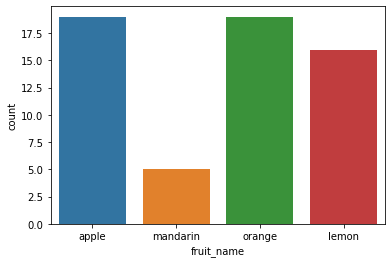

In [7]:
sns.countplot(x='fruit_name',data=dados)

In [8]:
dados['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

Observamos que temos um dataset não balanceado devido a quantidade da fruta mandarim. Iremos descobrir se isto irá ou não afetar o nosso modelo

Verificando se existem NaNs ou elementos nulos na amostra

In [9]:
dados.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [10]:
dados.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

Da análise observamos que tais elementos não existem

Obtendo os nomes das colunas

In [11]:
colunas = dados.columns

In [12]:
colunas

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

Removendo as colunas fruit_label e fruit_name

In [13]:
colunas = colunas.drop(['fruit_label', 'fruit_name'])

In [14]:
colunas

Index(['fruit_subtype', 'mass', 'width', 'height', 'color_score'], dtype='object')

Normalizando os dados

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc=StandardScaler()

In [17]:
dados[colunas.drop('fruit_subtype')] = sc.fit_transform(dados[colunas.drop('fruit_subtype')])

In [18]:
dados.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,0.529442,1.598690,-0.291397,-2.793595
1,1,apple,granny_smith,0.309462,1.104854,-0.661922,-2.268684
2,1,apple,granny_smith,0.236136,0.364100,-0.365502,-2.137456
3,2,mandarin,mandarin,-1.413709,-1.117409,-2.218131,0.487100
4,2,mandarin,mandarin,-1.450372,-1.364327,-2.292236,0.355872


A coluna fruit_subtype é uma variável categórica e precisa ser convertida para numérica

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
enconder = LabelEncoder()

In [21]:
dados['fruit_subtype'] = enconder.fit_transform(dados['fruit_subtype'])

In [22]:
enconder.classes_

array(['braeburn', 'cripps_pink', 'golden_delicious', 'granny_smith',
       'mandarin', 'selected_seconds', 'spanish_belsan', 'spanish_jumbo',
       'turkey_navel', 'unknown'], dtype=object)

In [23]:
dados.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,3,0.529442,1.598690,-0.291397,-2.793595
1,1,apple,3,0.309462,1.104854,-0.661922,-2.268684
2,1,apple,3,0.236136,0.364100,-0.365502,-2.137456
3,2,mandarin,4,-1.413709,-1.117409,-2.218131,0.487100
4,2,mandarin,4,-1.450372,-1.364327,-2.292236,0.355872


Separando nas variáveis X e Y

In [24]:
X = dados.drop(['fruit_label','fruit_name'],axis=1).values
Y = dados['fruit_label'].values

Separando em amostras de treino e teste

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=0)

Aplicando modelo KNN

No modelo KNN o número de vizinhos é uma variável de entrada. Para melhor determinar este número, iremos cacular a acurácia no intervalo entre 1 e 10.

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
modelo=KNeighborsClassifier()

Aplicando GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
parametros = {
    'n_neighbors' : np.arange(4,11),
    'weights' : ['uniform','distance'],
    'leaf_size' : np.arange(5,40)
    }

In [31]:
melhor_modelo = GridSearchCV(modelo, parametros, n_jobs=-1, cv=5, refit=True)

In [32]:
melhor_modelo.fit(X_treino, Y_treino)

/home/usuario/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39]),
                         'n_neighbors': array([ 4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']})

In [33]:
modelo_final = melhor_modelo.best_estimator_

In [34]:
modelo_final

KNeighborsClassifier(leaf_size=5, n_neighbors=4, weights='distance')

In [35]:
modelo_final.fit(X_treino,Y_treino)

KNeighborsClassifier(leaf_size=5, n_neighbors=4, weights='distance')

In [36]:
Y_previsto = modelo_final.predict(X_teste)

Gerando matriz de confusão

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
cm=confusion_matrix(Y_teste,Y_previsto)

In [39]:
cm

array([[4, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 8, 0],
       [0, 0, 0, 2]])